# Univarient Data Imputation : Numerical Data

### Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Dataframe

In [29]:
df= pd.read_csv('../EDA/Titanic-Dataset.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Getting insights on data

In [64]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* 177 missing values in Age.
* 2 missing values in Embarked.
* 687 missing vlaues in Cabin.

### train test split

In [7]:
X=pd.DataFrame(df.drop('Survived', axis=1))
y=pd.DataFrame(df['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X.shape, y.shape

((712, 11), (712, 1), (891, 11), (891, 1))

### PDF of Age Column

<Axes: xlabel='Age', ylabel='Density'>

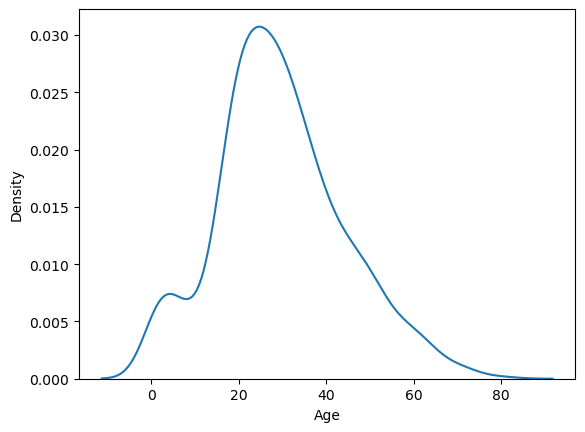

In [65]:
sns.kdeplot(x=df['Age'])

## CCA (Complete Case Analysis)

Complete Case Analysis (CCA) is a simple approach to handle missing data where only the rows with no missing values are used for analysis, and any row with one or more missing entries is discarded. While easy to implement, CCA can lead to loss of data and potential bias if the missingness is not completely random.

In [10]:
df_cca=pd.DataFrame(X_train.dropna())

In [11]:
df_cca.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### PDF on Age Column after CCA

<Axes: xlabel='Age', ylabel='Density'>

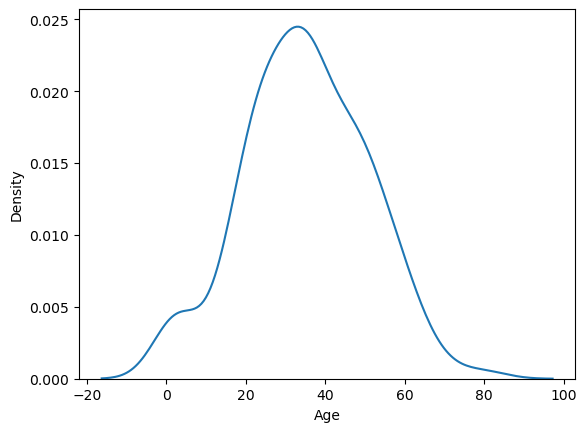

In [12]:
sns.kdeplot(x=df_cca['Age'])

## Mean Median and Mode  Method 

**Mean, Median, and Mode Imputation** is a basic method for handling missing data by replacing missing values with a central tendency measure of the observed data. **Mean imputation** uses the average, **median imputation** uses the middle value, and **mode imputation** uses the most frequent value. This method is simple and preserves dataset size but can **reduce variability** and may introduce **bias** if the data are not missing completely at random.


<Axes: xlabel='Age', ylabel='Density'>

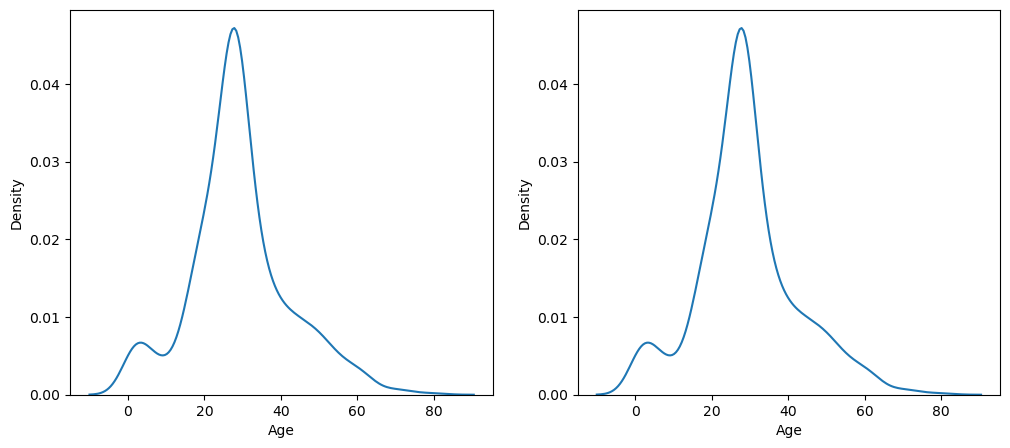

In [15]:
mean=X_train['Age'].mean()
df_mean=pd.DataFrame(X_train['Age'].fillna(mean))

median=X_train['Age'].median()
df_median=pd.DataFrame(X_train['Age'].fillna(median))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=df_median['Age'], ax=ax1)
sns.kdeplot(x=df_median['Age'], ax=ax2)

Both the plot are same because mean and median value are close to each other.

In [18]:
mean, median

(np.float64(29.498846153846156), 28.0)

## Random Value Imputation

**Random Value Imputation** is a method where missing values are filled by **randomly selecting observed values** from the same variable. This approach preserves the original distribution and variability of the data better than mean or median imputation. However, it assumes that the observed values are representative of the missing ones and can introduce randomness into analyses, so results may vary slightly each time it is applied.


Finding the null values

In [48]:
df['Age'].isnull().sum()

np.int64(177)

In [40]:
n_missing = df['Age'].isnull().sum()
 
# Randomly sample 'Age' values from X_train to fill missing ones
fill_values = np.random.choice(X_train['Age'].dropna(), n_missing, replace=True)

#copy of dataframe
df_random=df[['Age']]

# Fill the missing values
df_random.loc[df['Age'].isnull(), 'Age'] = fill_values


C:\Users\Rohit\AppData\Local\Temp\ipykernel_23812\226667058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random.loc[df['Age'].isnull(), 'Age'] = fill_values


In [42]:
df['Age'].isnull().sum(), df_random['Age'].isnull().sum()

(np.int64(177), np.int64(0))

### PDF Comparision

<Axes: xlabel='Age', ylabel='Density'>

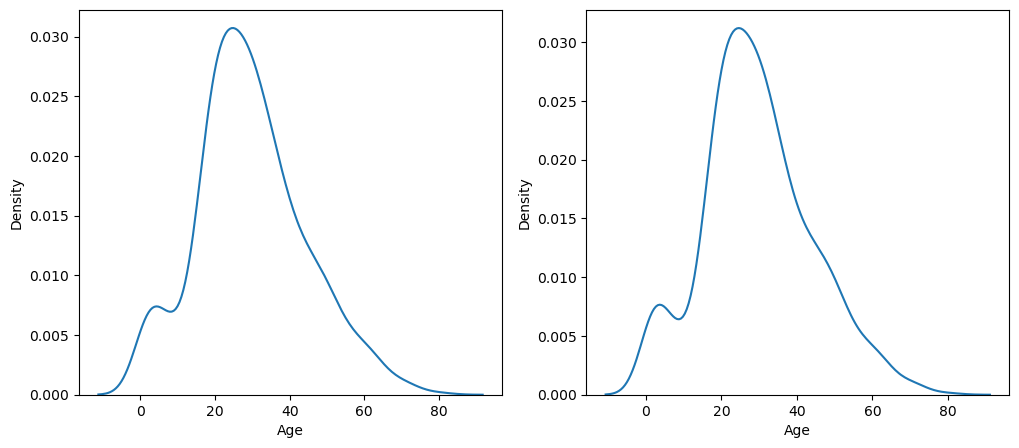

In [44]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=df['Age'], ax=ax1)
sns.kdeplot(x=df_random['Age'], ax=ax2)

In [47]:
df['Age'].var(), df_random['Age'].var()

(211.0191247463081, 207.56445380042584)

### Random value imputation with -1

**Random Value Imputation with –1** is a variant where missing values are replaced with a **special placeholder (–1)** instead of actual observed values, often combined with random sampling for other features. The –1 acts as a **flag** to indicate missingness, allowing models (especially tree-based algorithms) to learn that these values were originally missing. While it preserves information about missing entries, it can **distort the distribution** if interpreted as a real value, so it’s mainly used for machine learning rather than statistical analysis.


In [51]:
df['Age'].isnull().sum()

np.int64(177)

In [59]:
df_neg_1=df[['Age']]
df_neg_1.fillna(-1, inplace=True)
df_neg_1.isnull().sum(), df['Age'].isnull().sum()

C:\Users\Rohit\AppData\Local\Temp\ipykernel_23812\162877281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg_1.fillna(-1, inplace=True)


(Age    0
 dtype: int64,
 np.int64(177))

#### PDF Comparision

<Axes: xlabel='Age', ylabel='Density'>

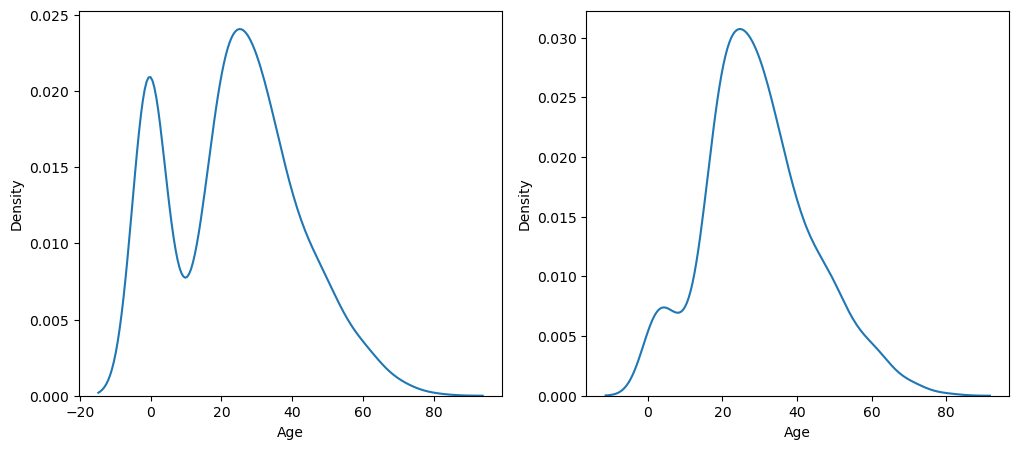

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=df_neg_1['Age'], ax=ax1)
sns.kdeplot(x=df['Age'], ax=ax2)

In [62]:
df['Age'].var(), df_neg_1['Age'].var()

(211.0191247463081, 319.24742711837445)

Age can't be negative it just for an example.

## End of Distribution

**End-of-Distribution Imputation** is a technique where missing values are replaced with a value at or just beyond the **extremes (tails) of the data distribution**—for example, slightly below the minimum or above the maximum. This creates a distinct “flag” for missing entries, allowing machine learning models to recognize them as special cases. While it helps retain missingness information, it can **distort the distribution** and **inflate variance**, so it’s mainly used for predictive modeling rather than statistical inference.


In [ ]:
## Normal Distributed data
1. Mean + 3*std
2. Mean- 3*std

In [ ]:
## Skewed Data
1. Q1 + 1.5*IQR
2. Q1 - 1.5*IQR

Replace the values with the above data as per requirements